In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/Tweets[1].csv')

In [3]:
df.sample(7)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
373,568452676452806656,neutral,0.6837,NaN,NaN,Virgin America,NaN,0504Traveller,NaN,0,@VirginAmerica Adds Pillows Instead of Lie-Fla...,NaN,2015-02-19 08:50:54 -0800,NaN,Central Time (US & Canada)
8038,568846033997803520,positive,1.0000,NaN,NaN,Delta,NaN,SMHillman,NaN,0,@JetBlue Of course U know I would like 2 lay y...,NaN,2015-02-20 10:53:57 -0800,"New York, NY",Eastern Time (US & Canada)
6863,570087324949864448,negative,1.0000,Can't Tell,1.0000,Delta,NaN,marcmansfield,NaN,0,@JetBlue my wife sent me a family invite but I...,NaN,2015-02-23 21:06:24 -0800,NaN,NaN
11257,568273310347165696,positive,0.6802,NaN,NaN,US Airways,NaN,CaraModisett,NaN,0,@USAirways Will do :),NaN,2015-02-18 20:58:09 -0800,"Memphis, Tennessee",Central Time (US & Canada)
6010,568437004045672448,positive,1.0000,NaN,NaN,Southwest,NaN,SamIam6915,NaN,0,@SouthwestAir @FortuneMagazine Love flying Sou...,NaN,2015-02-19 07:48:37 -0800,Minnesota,NaN
9537,569886919833874432,negative,1.0000,Customer Service Issue,0.6826,US Airways,NaN,dan3598328,NaN,0,"@USAirways Customer service is dead. Last wk, ...",NaN,2015-02-23 07:50:04 -0800,"Hillsborough, New Jersey",Eastern Time (US & Canada)
14460,569612947833671680,negative,1.0000,Bad Flight,0.3488,American,NaN,Meswannjr,NaN,0,@AmericanAir I get &amp; can appreciate that. ...,NaN,2015-02-22 13:41:24 -0800,"Plano, TX",Central Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

.

# **Drop Duplicates**

In [5]:
df.duplicated().value_counts()

,count
False,14604
True,36


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(14604, 15)

.

# **airline_sentiment**

In [8]:
df['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9159
neutral,3091
positive,2354


.

# **airline_sentiment_confidence**

In [9]:
df['airline_sentiment_confidence_range']= pd.cut(df['airline_sentiment_confidence'],bins=[0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00], labels=['under 10','under 20','under 30','under 40','under 50','under 60','under 70','under 80','under 90','under 100'])

.

# **negative_reason**

In [10]:
df.rename(columns={
    'negativereason':'negative_reason'
},inplace=True)

In [11]:
df['negative_reason'].value_counts()

,count
negative_reason,
Customer Service Issue,2904
Late Flight,1660
Can't Tell,1190
Cancelled Flight,843
Lost Luggage,721
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,480
longlines,178


In [12]:
df['negative_reason'].isnull().value_counts()

,count
negative_reason,
False,9159
True,5445


.

.

# **airline**

In [13]:
df['airline'].value_counts()

,count
airline,
United,3822
US Airways,2913
American,2723
Southwest,2420
Delta,2222
Virgin America,504


.

.

# **name**

In [14]:
df['name'].duplicated().value_counts()

,count
name,
False,7701
True,6903


**retweet_count**

In [15]:
df['retweet_count'].value_counts()

,count
retweet_count,
0,13838
1,639
2,66
3,22
4,17
5,5
7,3
6,3
22,2


In [16]:
(df.groupby('name')['retweet_count'].sum()).sort_values(ascending=False).head()

,retweet_count
name,
OBJ_3,80
JasonShaw2,31
TatianaKing,31
airliners2,28
seattlefordguy,22


.

.

# **text**

In [17]:
df['text'].duplicated().value_counts()

,count
text,
False,14427
True,177


In [18]:
(df['text'].duplicated() & df['name'].duplicated()).value_counts()

,count
False,14470
True,134


In [19]:
df[(df['text'].duplicated()) & (df['name'].duplicated())]['airline_sentiment_confidence_range'].value_counts()

,count
airline_sentiment_confidence_range,
under 100,95
under 70,34
under 80,3
under 40,1
under 60,1
under 10,0
under 20,0
under 30,0
under 50,0


In [20]:
df[(df['text'].duplicated()) & (df['name'].duplicated())][['airline_sentiment_confidence_range','tweet_created']].value_counts()

airline_sentiment_confidence_range  tweet_created            
under 100                           2015-02-24 09:54:34 -0800    2
                                    2015-02-24 11:43:05 -0800    2
under 40                            2015-02-24 11:01:13 -0800    1
under 60                            2015-02-24 09:33:08 -0800    1
under 70                            2015-02-17 21:32:22 -0800    1
                                                                ..
under 100                           2015-02-24 11:37:27 -0800    1
                                    2015-02-24 11:38:11 -0800    1
                                    2015-02-24 11:38:47 -0800    1
                                    2015-02-24 11:40:52 -0800    1
                                    2015-02-24 11:41:02 -0800    1
Name: count, Length: 132, dtype: int64

In [21]:
df['text'].isnull().value_counts()

,count
text,
False,14604


In [22]:
pd.set_option('display.max_colwidth', None)
df[['airline','text']].sample(12)

,airline,text
8376,Delta,@JetBlue loves Cancelled Flightling tickets and not telling their customers #flyunited
7627,Delta,@JetBlue on flight 622 from Nassau to JFK. Not showing Cancelled Flightled yet but assuming it will be? Any info?
11157,US Airways,"“@USAirways: Reminder: From 2/28, we’ll be tweeting from @AmericanAir. You should join us: http://t.co/WBMHRl3bvl"
11488,US Airways,"@USAirways So we got her home, now we just need her bag. Is there a direct desk number for Savannah?"
11851,US Airways,@USAirways you have the ability to switch my flight to @AmericanAir but you cannot tell me where my bags are.
8012,Delta,@JetBlue you know it!!
7437,Delta,@JetBlue exactly why is my flight delayed? 599 BDL to DCA? Can't seem to get an answer
1082,United,"@united since bulkhead seats cannot have bags on floor, why don't u reserve o/head space above those seats? In 1B on UA246 - not impressed"
4218,United,@united who can tell me where they are?
13661,American,@AmericanAir flight Cancelled Flighted! I'm trying to get to #chicago. What are me and @justynmoro gonna do. #flying#flight#travel


In [23]:
df['text'].isna().value_counts()

,count
text,
False,14604


# **df['mention name']**

In [24]:
df['text'].str.startswith('@',na=False).value_counts()

,count
text,
True,14136
False,468


In [25]:
df['mention name']=df['text'].str.extract(r'(^@[a-zA-z]+)')

In [26]:
df['mention name'].isna().sum()

np.int64(468)

.

.

# **df['hash tag']**

In [27]:
df['hash tag'] =df['text'].str.extract(r'(^#[a-zA-z/d]+)')

In [28]:
df['hash tag']

,hash tag
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
14635,NaN
14636,NaN
14637,NaN
14638,NaN


In [29]:
hashtags_list = df[df['hash tag'].isna() == False]['hash tag'].to_list()
print(hashtags_list)

['#Real', '#nothelpful']


In [30]:
! pip install urlextract

In [31]:
from urlextract import URLExtract
extractor=URLExtract()
df['urls']=df['text'].apply(extractor.find_urls)

.

.

# **df['urls']**

In [32]:
df['urls'].value_counts()

,count
urls,
[],13417
[http://t.co/3fq3XElbOn],4
[http://t.co/aQjn4HwNaC],4
[http://t.co/rfXlV1kGDh],4
[http://t.co/4ojrSDWPkK],3
...,...
"[https://t.co/OQUKSo3s2O, https://t.co/OQUKSo3s2O]",1
[http://t.co/QjKL4aBprG”],1
[http://t.co/9UNxqOTzIK],1


# **EMOJIES**

In [33]:
! pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 9.2 MB/s eta 0:00:00


In [34]:
def extract_emojis(text):
    return emoji.distinct_emoji_list(text)

df['emojis'] = df['text'].apply(extract_emojis)

In [35]:
df[df['emojis'].apply(bool)]['emojis']

,emojis
18,"[👍, ☺️, ❤️]"
24,[😡]
30,[😢]
36,"[✈, 💜]"
42,"[💺, 👍, 🍷, ✈️]"
...,...
14430,[😃]
14478,[✈️]
14515,"[✈️, ✌️]"
14632,[😂]


In [36]:
import re
import emoji

def clean_emojis_only(text):
    # Replaces emojis with text codes like :smiley: and then removes them
    text = emoji.demojize(text)
    text = re.sub(r':\S+:', '', text)
    return text.strip()

df['cleaned_text'] = df['text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

df['cleaned_text'] = df['cleaned_text'].str.replace(r'@\w+', '', regex=True)

df['cleaned_text'] = df['cleaned_text'].str.replace(r'#\w+', '', regex=True)

df['cleaned_text'] = df['cleaned_text'].apply(clean_emojis_only)


In [37]:
df.sample(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negative_reason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment_confidence_range,mention name,hash tag,urls,emojis,cleaned_text
13431,569865061855932416,negative,1.0,Cancelled Flight,0.6501,American,NaN,Mj_Effects,NaN,0,...,NaN,2015-02-23 06:23:12 -0800,"Manhattan, NY",Eastern Time (US & Canada),under 100,@AmericanAir,NaN,[http://t.co/XHSUUpHeZe],[✈️],this is the biggest joke of I've ever seen from a brand
3564,568265475114663936,negative,1.0,Late Flight,0.6749,United,NaN,grath57,NaN,0,...,NaN,2015-02-18 20:27:01 -0800,NaN,NaN,under 100,@united,NaN,[],[],My flying United is over...sorry. The Captain still had 20 minutes of pre-flight preparations to make while we sat with no air!
2262,569289573395800064,negative,1.0,Customer Service Issue,1.0000,United,NaN,bartha75,NaN,0,...,"[0.0, 0.0]",2015-02-21 16:16:25 -0800,san diego,NaN,under 100,@united,NaN,[],[],your costumer service today in the Providence airport was sucked. Recommend your airline learn to check the weather and be honest


.

.

.

# **'tweet_created'**

In [42]:
df['tweet_created'][1]

'2015-02-24 11:15:59 -0800'

In [50]:
df['tweet_created']=df['tweet_created'].str.replace(r'((?:-)\d{4})','',regex=True)

In [52]:
df['tweet_created']=pd.to_datetime(df['tweet_created'])

In [55]:
df['tweet_created'].isna().sum()

np.int64(0)

.

.

.

# **day_of_week**

In [60]:
df['day_of_week']=df['tweet_created'].dt.day_name()

In [70]:
df['day_of_week'].value_counts(2)

,proportion
day_of_week,
Sunday,0.210833
Monday,0.207614
Tuesday,0.185976
Saturday,0.106615
Friday,0.102712
Thursday,0.094221
Wednesday,0.092030


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

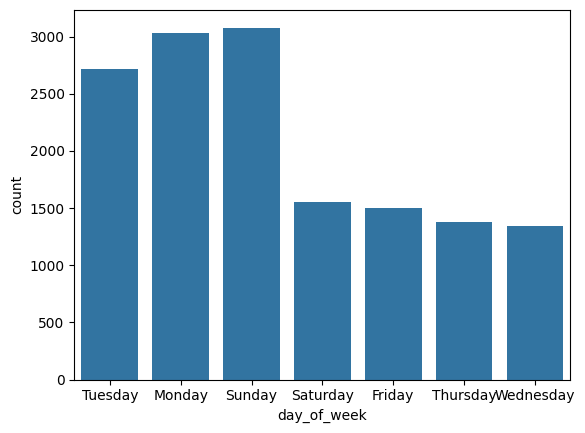

In [72]:
sns.countplot(data=df,x='day_of_week')
plt.show()

In [62]:
df['hour']=df['tweet_created'].dt.hour

In [68]:
df['hour'].value_counts(1).head()

,proportion
hour,
9,0.068406
11,0.066831
10,0.065051
14,0.063476
8,0.063407


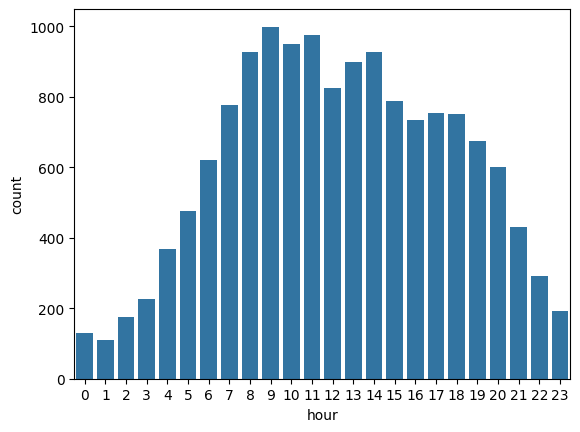

In [75]:
sns.countplot(data=df,x='hour')
plt.show()